## EDA on penguins_lter.csv

### import neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

### Read the data

In [2]:
data=pd.read_csv('./penguins_lter.csv')

In [3]:
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


### Basic information about the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

* The data has 344 rows and 17 columns

### Detection of  outliers or missing values(Task-3)

In [5]:
data.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

### Visualization of missing values

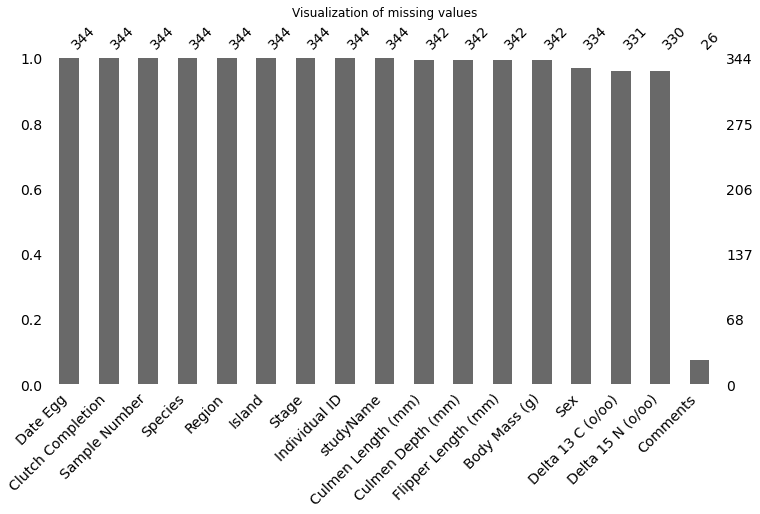

In [6]:
missingno.bar(data, fontsize=14, sort='descending',figsize=(12,6))
plt.title("Visualization of missing values")
plt.show()

* The variables which having missing values are **sex,delta 13 C, Delta 15 N, Comments**
* for missing values of variables we will replace numerical values with meadian of max and min and catogerical data with NaN.

In [7]:
data[data.isnull().any(axis=1)]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/01/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [8]:
df=pd.read_csv('./penguins_lter.csv')

* Here we have used new dataframe as 'df' instead of original dataframe 'data' to keep origial data intact

In [9]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [10]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

## Missing value treatment

**NUMERICAL**

In [11]:
df['Culmen Length (mm)'].min(),df['Culmen Length (mm)'].max(),df['Culmen Length (mm)'].mean(),df['Culmen Length (mm)'].median()

(32.1, 59.6, 43.9219298245614, 44.45)

In [12]:
df['Culmen Depth (mm)'].min(),df['Culmen Depth (mm)'].max(),df['Culmen Depth (mm)'].mean(),df['Culmen Depth (mm)'].median()

(13.1, 21.5, 17.151169590643278, 17.3)

In [13]:
df['Flipper Length (mm)'].min(),df['Flipper Length (mm)'].max(),df['Flipper Length (mm)'].mean(),df['Flipper Length (mm)'].median()

(172.0, 231.0, 200.91520467836258, 197.0)

In [14]:
df['Body Mass (g)'].min(),df['Body Mass (g)'].max(),df['Body Mass (g)'].mean(),df['Body Mass (g)'].median()

(2700.0, 6300.0, 4201.754385964912, 4050.0)

In [15]:
df['Delta 15 N (o/oo)'].min(),df['Delta 15 N (o/oo)'].max(),df['Delta 15 N (o/oo)'].mean(),df['Delta 15 N (o/oo)'].median()

(7.6322, 10.02544, 8.7333816969697, 8.652405)

In [16]:
df['Delta 13 C (o/oo)'].min(),df['Delta 13 C (o/oo)'].max(),df['Delta 13 C (o/oo)'].mean(),df['Delta 13 C (o/oo)'].median()

(-27.01854, -23.78767, -25.6862915407855, -25.83352)

In [17]:
df['Culmen Length (mm)'].fillna(value=44.45,inplace=True)
df['Culmen Depth (mm)'].fillna(value=17.3,inplace=True)
df['Flipper Length (mm)'].fillna(value=197.0,inplace=True)
df['Body Mass (g)'].fillna(value=4050.0,inplace=True)
df['Delta 15 N (o/oo)'].fillna(value=8.652405,inplace=True)
df['Delta 13 C (o/oo)'].fillna(value= -25.83352,inplace=True)

In [18]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                     10
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               318
dtype: int64

* All numerical missing values has been replaced, now categorical missing values need to be treated

## Missing value treatment
**CATEGORICAL**

In [19]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [20]:
df['Comments'].value_counts()

Nest never observed with full clutch.                                   13
Not enough blood for isotopes.                                           6
No blood sample obtained.                                                2
No blood sample obtained for sexing.                                     2
Adult not sampled.                                                       1
Nest never observed with full clutch. Not enough blood for isotopes.     1
Sexing primers did not amplify. Not enough blood for isotopes.           1
Name: Comments, dtype: int64

In [21]:
df[df.isnull().any(axis=1)]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.50,17.4,186.0,3800.0,FEMALE,8.949560,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.30,18.0,195.0,3250.0,FEMALE,8.368210,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,44.45,17.3,197.0,4050.0,NaN,8.652405,-25.83352,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.70,19.3,193.0,3450.0,FEMALE,8.766510,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.30,20.6,190.0,3650.0,MALE,8.664960,-25.29805,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/01/2009,44.45,17.3,197.0,4050.0,NaN,8.652405,-25.83352,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.80,14.3,215.0,4850.0,FEMALE,8.411510,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.40,15.7,222.0,5750.0,MALE,8.301660,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.20,14.8,212.0,5200.0,FEMALE,8.242460,-26.11969,NaN


In [22]:
df['Sex'].replace('.',np.NaN,inplace=True)

In [23]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
Name: Sex, dtype: int64

* The outlier('.')has been replaced with NaN.


In [24]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                     11
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               318
dtype: int64

* Now we will replace this 'NaN' with 'UNKNOWN' for visualization notation

In [25]:
df['Sex'].fillna(value='UNKNOWN',inplace= True)
df['Comments'].fillna(value='UNKNOWN',inplace= True)

In [26]:
df['Sex'].value_counts()

MALE       168
FEMALE     165
UNKNOWN     11
Name: Sex, dtype: int64

In [27]:
df['Comments'].value_counts()

UNKNOWN                                                                 318
Nest never observed with full clutch.                                    13
Not enough blood for isotopes.                                            6
No blood sample obtained.                                                 2
No blood sample obtained for sexing.                                      2
Adult not sampled.                                                        1
Nest never observed with full clutch. Not enough blood for isotopes.      1
Sexing primers did not amplify. Not enough blood for isotopes.            1
Name: Comments, dtype: int64

In [28]:
df.isna().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
dtype: int64

* At this point all outliers has been removed and NaN replaced with 'UNKNOWN' in Sex and Comments column

# Ploting of different features


### 1) The no of Species and penguins

In [29]:
df.Species.value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

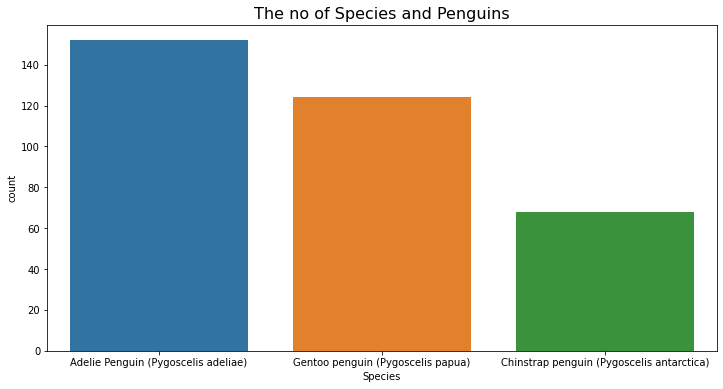

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Species', data = df,order=df['Species'].value_counts().index)
plt.title("The no of Species and Penguins",fontsize=16)
plt.show()

### Observation:-
       1) The species Adelie Penguin(Pygoscelis adeliae) has the maximum number of penguins
       2) The species Chinstrap penguin(Pygoscelis antarctica) has the minimum bunber of penguins

### 2) The no of islands

In [31]:
df.Island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

* There are three different islands.
* Now we will plot the count of penguins lives on each island

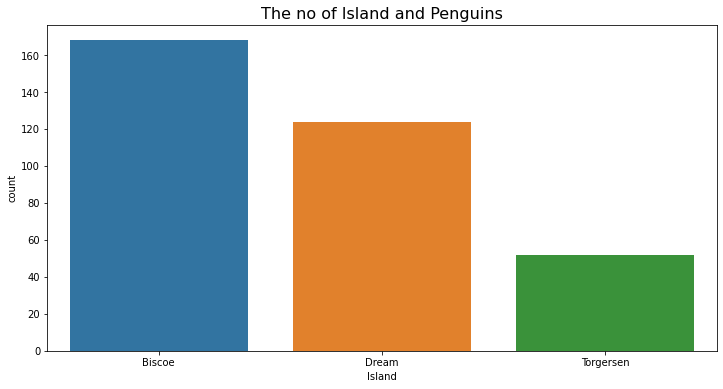

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Island',data = df,order=df['Island'].value_counts().index)
plt.title("The no of Island and Penguins",fontsize=16)
plt.show()

### Observation:-
       1) The island Biscoe has the maximum number of penguins
       2) The island Torgersen has the minimum number of penguins

### 3) The sexwise distribution of penguins

In [33]:
df.Sex.value_counts()

MALE       168
FEMALE     165
UNKNOWN     11
Name: Sex, dtype: int64

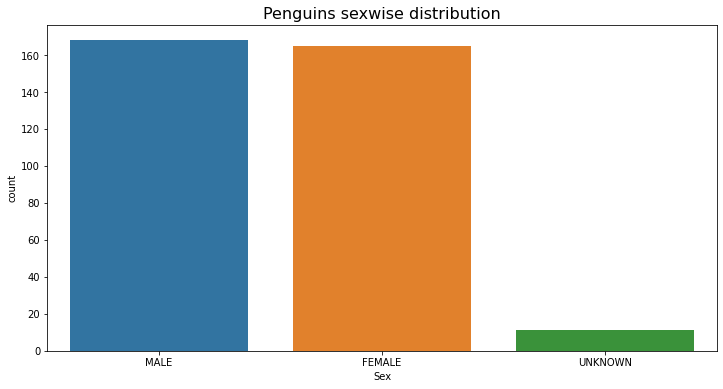

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Sex', data = df,order=df['Sex'].value_counts().index)
plt.title("Penguins sexwise distribution",fontsize=16)
plt.show()

### 4) The specieswise distribution of penguins on each island

<AxesSubplot: xlabel='Island', ylabel='Count'>

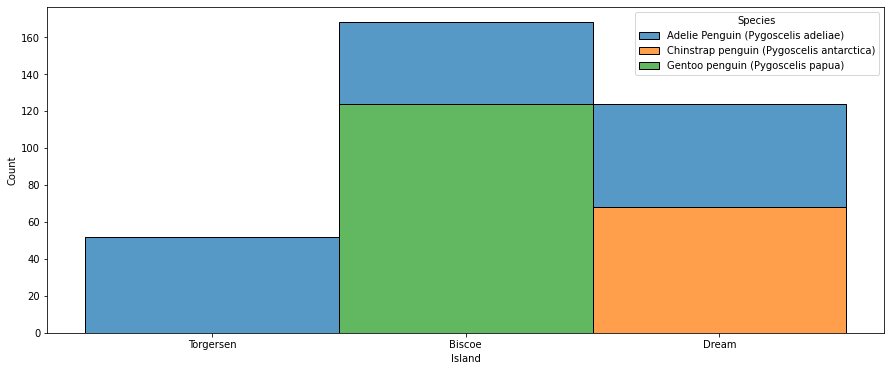

In [35]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x="Island",hue="Species",multiple="stack")

### 5)Clutch Completion

In [36]:
df['Clutch Completion'].value_counts()

Yes    308
No      36
Name: Clutch Completion, dtype: int64

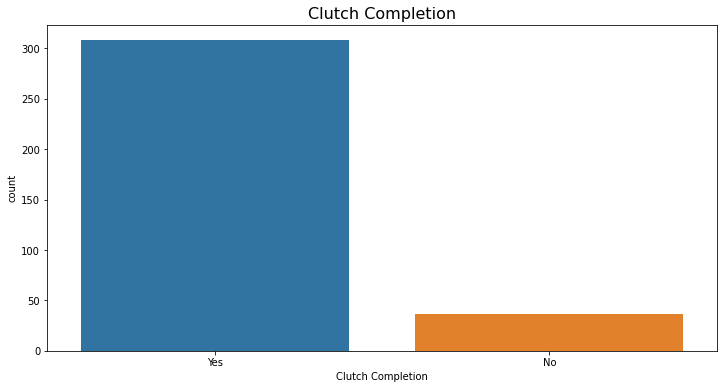

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Clutch Completion', data = df,order=df['Clutch Completion'].value_counts().index)
plt.title("Clutch Completion",fontsize=16)
plt.show()

In [38]:
male_data=df[df['Sex']=='MALE']

In [40]:
male_data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,8.652405,-25.83352,Not enough blood for isotopes.
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.664960,-25.29805,UNKNOWN
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.460600,-24.89958,Nest never observed with full clutch.
13,PAL0708,14,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N7A2,Yes,11/15/07,38.6,21.2,191.0,3800.0,MALE,8.652405,-25.83352,Not enough blood for isotopes.
14,PAL0708,15,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N8A1,Yes,11/16/07,34.6,21.1,198.0,4400.0,MALE,8.555830,-25.22588,UNKNOWN


In [42]:
male_data['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          73
Gentoo penguin (Pygoscelis papua)            61
Chinstrap penguin (Pygoscelis antarctica)    34
Name: Species, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Count'>

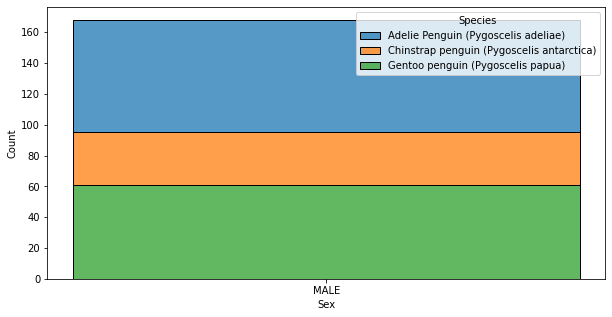

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(data=male_data,x="Sex",hue="Species",multiple="stack")

In [45]:
female_data=df[df['Sex']=='FEMALE']

In [46]:
female_data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.949560,-24.69454,UNKNOWN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.368210,-25.33302,UNKNOWN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.766510,-25.32426,UNKNOWN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.187180,-25.21799,Nest never observed with full clutch.
12,PAL0708,13,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N7A1,Yes,11/15/07,41.1,17.6,182.0,3200.0,FEMALE,8.652405,-25.83352,Not enough blood for isotopes.


In [47]:
female_data['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          73
Gentoo penguin (Pygoscelis papua)            58
Chinstrap penguin (Pygoscelis antarctica)    34
Name: Species, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Count'>

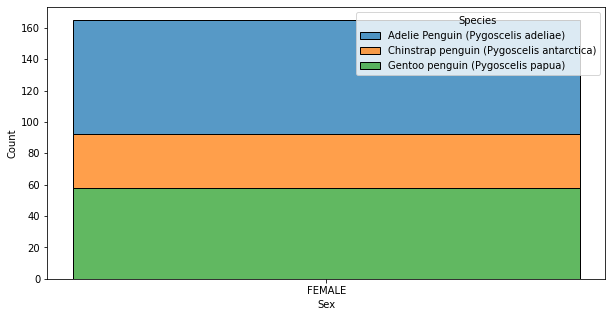

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(data=female_data,x="Sex",hue="Species",multiple="stack")

 # Co-relation between different variables

**The co-relation between body_mass_g and culmen_length_mm with sex identity**

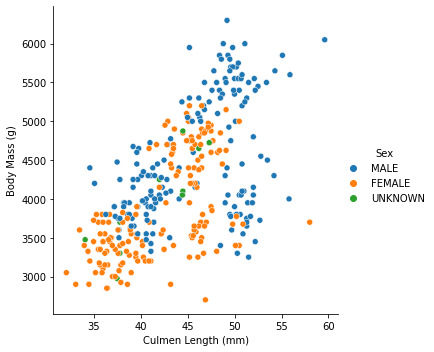

In [50]:
sns.relplot(df,x='Culmen Length (mm)', y='Body Mass (g)',hue='Sex')

**The co-relation between body_mass_g and culmen_depth_mm with sex identity**

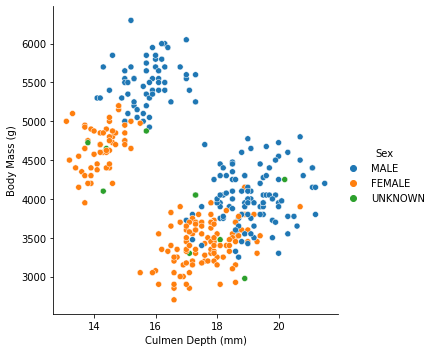

In [52]:
sns.relplot(df,x='Culmen Depth (mm)', y='Body Mass (g)',hue='Sex')

**The co-relation between body_mass_g and culmen_length_mm with species identity**

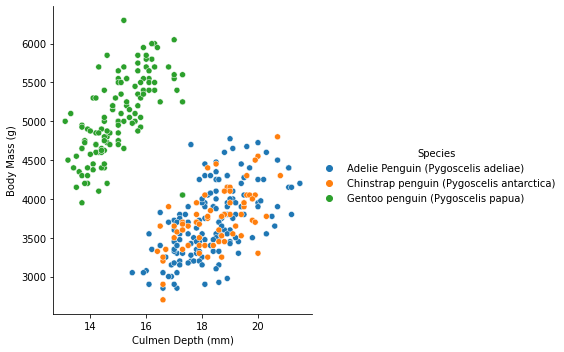

In [53]:
sns.relplot(df,x='Culmen Depth (mm)', y='Body Mass (g)',hue='Species')

**The co-relation between body_mass_g and culmen_depth_mm with species identity**

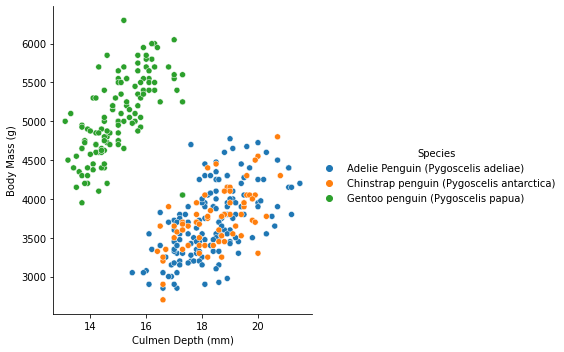

In [54]:
sns.relplot(df,x='Culmen Depth (mm)', y='Body Mass (g)',hue='Species')

**The co-relation between body_mass_g and flipper_length_mm with sex identity**

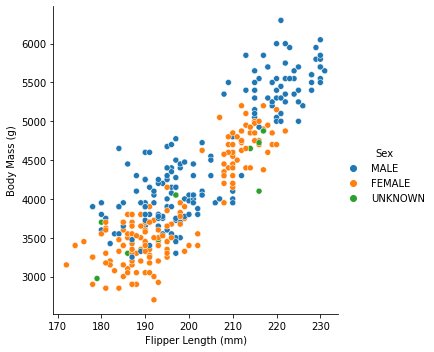

In [56]:
sns.relplot(df,x='Flipper Length (mm)', y='Body Mass (g)',hue ='Sex')

**The co-relation between body_mass_g and flipper_length_mm with species identity**

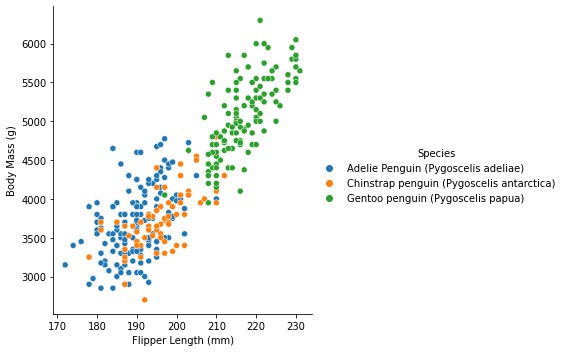

In [58]:
sns.relplot(df,x='Flipper Length (mm)', y='Body Mass (g)',hue='Species')

## Presence  of species on different islands of penguins based on body mass 

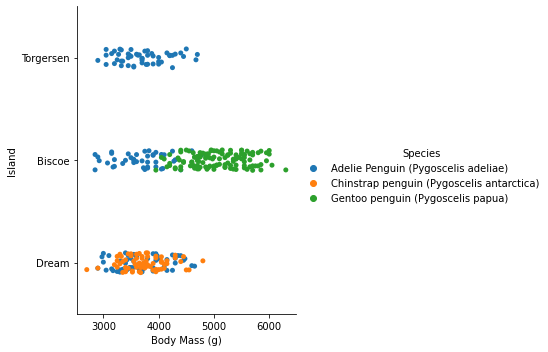

In [59]:
sns.catplot(x='Body Mass (g)',y='Island',data=df,hue='Species')